# Libraries

In [1]:
import json
import pandas as pd

# Preprocess

In [2]:
test_df = pd.read_csv("test.csv")
test_df.drop("Unnamed: 0", inplace=True, axis=1)

In [3]:
test_df

,input,label,predicted
0,Saya berhasil mendapatkan pekerjaan berkat dia.,"thisissos Thanks to him, I was able to find a ...",i working to get with another job
1,Apakah di sini salju turun dengan deras saat m...,thisissos Does it snow a lot here in the winte...,does it rain much its been hard
2,Buku-buku ini bukan hanya untuk anak-anak.,thisissos These books aren't just for children...,this books are not only a child not these book...
3,Tom terkejut mengetahui Mary memiliki sepeda m...,thisissos Tom was surprised Mary had a motorcy...,tom was surprised after mary had a couldnt tra...
4,Apa suasana hatimu sedang buruk?,thisissos Are you in a bad mood? thisiseos,what are you change his right
...,...,...,...
1379,Air matanya mulai berlinang di wajahnya.,thisissos Tears began to roll down her face. t...,the high school if the matter what he had face...
1380,Tuhan adalah kejahatan,thisissos God is bad. thisiseos,god is the god and i want of her to know is th...
1381,Bagaimana keadaannya?,thisissos What is the situation like? thisiseos,whats the glass into the thats up thats the th...
1382,Aku tahu seseorang sedang mengawasiku.,thisissos I know somebody's watching me. thisi...,i know someone is someone


In [4]:
def replace_token(label):
    label = label.replace("thisissos ", "")
    label = label.replace(" thisiseos", "")
    return label
test_df["label"] = test_df["label"].apply(replace_token)

In [5]:
test_df

,input,label,predicted
0,Saya berhasil mendapatkan pekerjaan berkat dia.,"Thanks to him, I was able to find a job.",i working to get with another job
1,Apakah di sini salju turun dengan deras saat m...,Does it snow a lot here in the winter?,does it rain much its been hard
2,Buku-buku ini bukan hanya untuk anak-anak.,These books aren't just for children.,this books are not only a child not these book...
3,Tom terkejut mengetahui Mary memiliki sepeda m...,Tom was surprised Mary had a motorcycle.,tom was surprised after mary had a couldnt tra...
4,Apa suasana hatimu sedang buruk?,Are you in a bad mood?,what are you change his right
...,...,...,...
1379,Air matanya mulai berlinang di wajahnya.,Tears began to roll down her face.,the high school if the matter what he had face...
1380,Tuhan adalah kejahatan,God is bad.,god is the god and i want of her to know is th...
1381,Bagaimana keadaannya?,What is the situation like?,whats the glass into the thats up thats the th...
1382,Aku tahu seseorang sedang mengawasiku.,I know somebody's watching me.,i know someone is someone


In [6]:
def load_data(path):
    with open(path) as f:
        lst = [tuple(x) for x in json.load(f)]
        return lst
    
train_df = pd.DataFrame(load_data("train.json"), columns=["id", "en"])

In [7]:
for _, data in train_df.iterrows():
    print(data["id"])
    print(data["en"])
    print()

Streaming output truncated to the last 5000 lines.
thisissos I read books and magazines to keep up with the times. thisiseos

Apa kau percaya pada evolusi?
thisissos Do you believe in evolution? thisiseos

Hanya ibuku yang mengerti aku.
thisissos Only my mother understands me. thisiseos

Dia di rumah, tapi tidak ada yang melihatnya.
thisissos He is at home, but no one can see him. thisiseos

Tom menikahi adiknya Mary dan Mary menikahi kakaknya Tom.
thisissos Tom married Mary's sister and Mary married Tom's brother. thisiseos

Raja itu tinggal di istana.
thisissos The king lives in the castle. thisiseos

Kita tidak bisa menjual gelang itu.
thisissos We can't sell that bracelet. thisiseos

Aku pikir itu baik untuk kita semua.
thisissos I think it would be good for all of us. thisiseos

Mari kita melakukannya lagi.
thisissos Let's do that again. thisiseos

Semua orang dipersilahkan.
thisissos All are welcome. thisiseos

Bolehkah saya meminjam telepon Anda?
thisissos May I use your phone? 

# Error Analysis

## Average Length

In [8]:
test_df["input"].apply(len).mean()

35.44725433526011

In [9]:
test_df["label"].apply(len).mean()

31.15173410404624

In [10]:
test_df["predicted"].apply(len).mean()

232.5520231213873

From the above average of length for each datasets, we see that there is severe disparity between the predicted sentence and the label given. The only possible cause of this problem is that the model has not been able to correctly know when to end the sentence, i.e. failed to predict the `[EOS]` before the maximum number of tokens reached, causing the length of the sentences explodes.

## 0 - 249

In [11]:
for _, data in test_df[: 250].iterrows():
    print(data["input"])
    print(data["label"])
    print(data["predicted"])
    print()

Saya berhasil mendapatkan pekerjaan berkat dia.
Thanks to him, I was able to find a job.
i working to get with another job

Apakah di sini salju turun dengan deras saat musim dingin?
Does it snow a lot here in the winter?
does it rain much its been hard

Buku-buku ini bukan hanya untuk anak-anak.
These books aren't just for children.
this books are not only a child not these books are a children not i really so the children not not this books for just these not that this are just these books are bad this books for children are not make children dont to make children are built for my children this are the children not of children so these books to make children not really all this books are all this books are my children not so tired of children not really not really all this books are my children not really bad this books that children not called these books are all this coffee this books are my children not really bad this books are all this books that children not so tired of childre

## 250 - 499

In [12]:
for _, data in test_df[250 : 500].iterrows():
    print(data["input"])
    print(data["label"])
    print(data["predicted"])
    print()

Sepertinya Tom bosan.
I think that Tom is bored.
i dont think tom is sick of city

Mereka dulunya menjunjung tinggi derajat ayahnya.
They used to look up to their father.
they was an high tall as he was by dad was he would being left by it family their that he was by dad was being tall as he was high young men used to prison as tall as tall as he was being family family the dad was his father used it he was the dad was high for his father by life their family family by it family being tall as tall as tall as tall as tall as tall as tall as tall as he was high family being family his father being left try about just family family would family family family family family family family family being family family family family family family family family family family family his father by his family family family family family being just had just by just had high family family family family family family family life his father being high family family family family the dad was his family f

## 500 - 749

In [13]:
for _, data in test_df[500 : 750].iterrows():
    print(data["input"])
    print(data["label"])
    print(data["predicted"])
    print()

Kita tenggelam?
Are we sinking?
we was being usually of being late it was all

Dia harus pergi ke sana besok.
He must go there tomorrow.
he must go there tomorrow

Meja yang mana?
Which table?
where did you have

Saya berhenti dari pekerjaan saya sebagai seorang guru.
I'm quitting my job as a teacher.
i stop from the job of a teacher as a teacher as a teacher as a teacher as a teacher as my teacher old job

Kamu harus kembali.
You need to go back.
you have to come back again

Tom berusaha sekeras mungkin untuk bisa sampai ke sini, tapi dia tidak berhasil.
Tom tried his best to get here, but he didn't make it.
tom tried to be true as it for here but he could not to be able to do he can not to do not to give him because he cant you cant be says as here but he can not work her own job by no job with one today as not work because he cant work but he wouldnt be able to do that he wouldnt work but he cant does not work for not work here but he cant do not work but he wouldnt be able to do no

## 750 - 999

In [14]:
for _, data in test_df[750 : 1000].iterrows():
    print(data["input"])
    print(data["label"])
    print(data["predicted"])
    print()

Suatu kehormatan bisa bekerja sama dengan anda.
It was a great privilege working with you.
there was an job by ill be at all

Aku memahami kemarahannya.
I understand his anger.
i understand her the truth time i asked me to understand her

Berapa banyak yang mereka butuhkan?
How many do they need?
how much do they need need you need to need to need

Aku tidak di sini untuk liburan.
I'm not here for a vacation.
i cant here alone for summer

Sami tidak datang ke sini.
Sami didn't come here.
sami doesnt come here

Kenapa kamu sudah tidak bermain banjo lagi?
Why don't you play the banjo anymore?
why dont you have playing the summer anymore

Tenanglah.
Calm down.
customs go found to found out the found found found found found found out to found found found found found out to found found to found found found found down go found to found found found down go found to found found found found to found found down go found found and found found found found found down his go found found found found 

## 1000 - End

In [15]:
for _, data in test_df[1000 :].iterrows():
    print(data["input"])
    print(data["label"])
    print(data["predicted"])
    print()

Biasanya ada dua sampai lima gerhana bulan setiap tahun.
There are usually between two and five lunar eclipses each year.
usually there are two so much thing every year

Nyalakan kipas anginnya.
Turn the fan on.
turn on off around the take a take off around the take a young

Dia bilang dia tidak tahu.
She said she doesn't know.
he said he doesnt know that he knows not know that he knows not know that he didnt know that he knows not know doesnt know

Aku pikir kamu akan menyukainya.
I think that you are going to like it.
i dont think you like it would like it

Berani-beraninya kau berbicara kepada anakku seperti itu!
How dare you talk to my son like that!
what youre talking to the son

Bank buka pada pukul sembilan.
Banks open at nine o'clock.
the bank open at eight

Bukankah itu adalah hal yang seharusnya dilakukan?
Isn't that what needs to be done?
didnt it was any thing that to do it

Andi menulis surat kepada ibunya setiap minggu.
Andi writes a letter to her mother every week.
what 

# Summary

## Semantically and Grammatically Correct

Some of the translated sentences are both semantically and grammatically correct and are the same with the label as can be seen below.


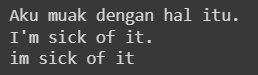

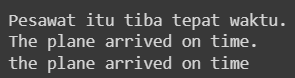

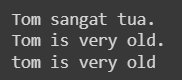

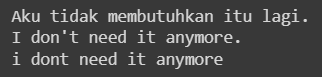

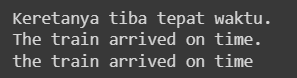

## Correct Substitution

Some of the translated sentences are correct semantically even if the words used in the translation are different.

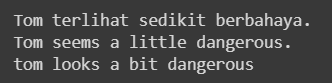

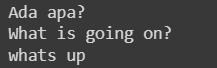

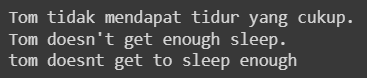

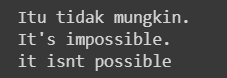

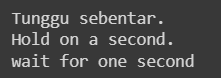

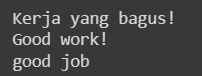

## Semantically Correct Gramatically Wrong

Some of the translated sentences are semantically correct but grammatically wrong (read: different, since there might be no context provided and the grammar can actually be correct).

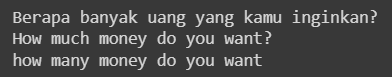

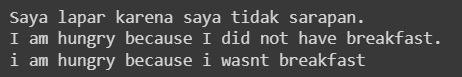

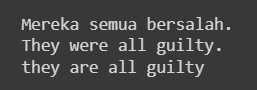

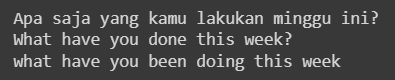

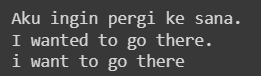

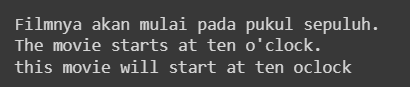

## Semantically Correct with Syntactical Extension

Some of the translated sentences are correct semantically even though there are syntactic extension (repetitive translation) included in the translation.

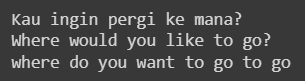

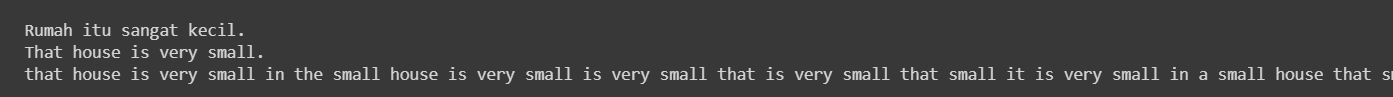

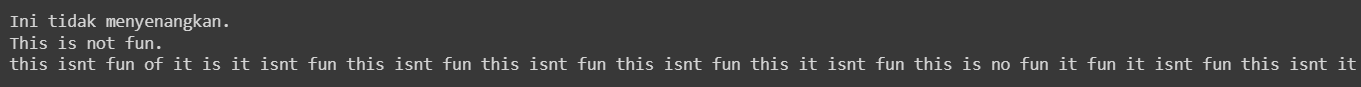

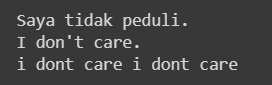

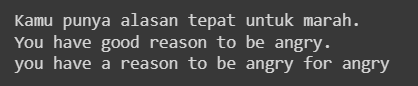

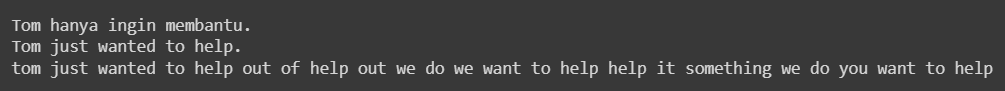

## Just Wrong.

Some are just... nonsense...

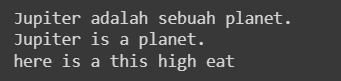

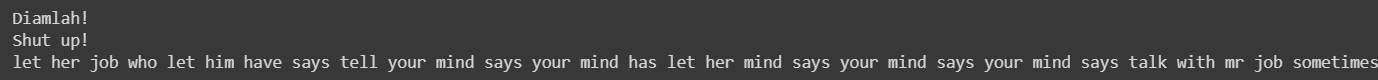

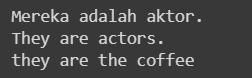

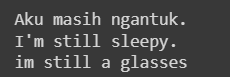

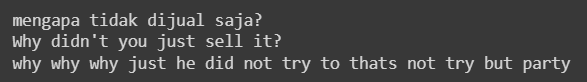

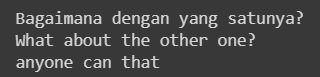

## Takeaways

Generally, the model usually got confused when the length of the sentence is above 8-10 tokens. It first correctly or nearly translates the correct tokens and proceeds to lose its context, causing the next predicted tokens to be wrong.

Mostly, all nonsensical translations are generated because the lack of data for either the corresponding sentence structure variation and the words itself (only 3-5 training data). This also happens for the emotion vocabularies (for example, `sad`) that has little training data.

We saw from the other Notebook that the `BLEU (Bilingual Evaluation Understanding) Score` evaluation on the test set for the model has 40.2% score. According to Google as provided in this [documentation](https://cloud.google.com/translate/automl/docs/evaluate#bleu), we can infer that the model we built is good enough for simple translations.

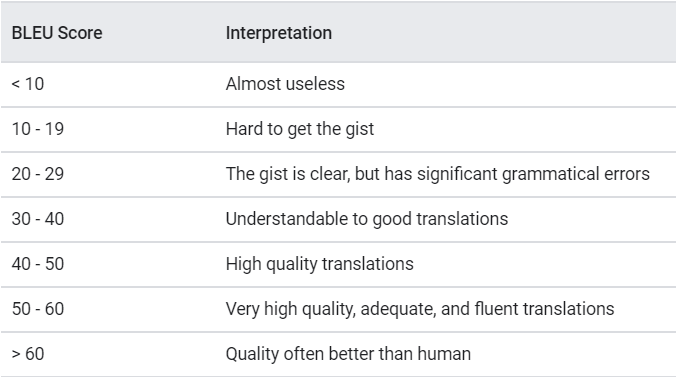

The main way to improve the model would be to increase the number of training data used. The current implementation only has approximately 13k data, which then is splitted into 11k training data and 1.3k validation and test data each. This number is still quite small considering that there are just massive number of variations in either the Indonesian or English sentences. Providing more data will surely improve the performance of the model, especially data related to emotions (related to the NLP pipeline). 

For the hyperparameters, namely the `embed_dim`, `latent_dim`, and `num_heads`, the executed tuning produces these values: `[128, 1024, 8]`. These are not the maximum values for the latent dimension and the number of heads, meaning that these hyperparameters can be fixed. On the other hand, increasing the embedding dimension might also improve the performance of the model.